In [1]:
# Import packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_palette("tab10")

import random as rnd
import numpy as np
rnd.seed(0)
np.random.seed(0)

import scipy.stats as stats
import bayes_logistic

from utils import *

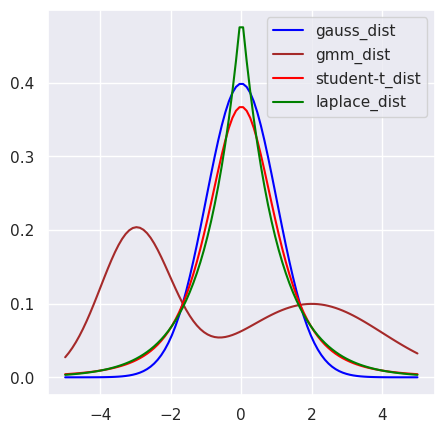

In [96]:
# num_samples 
num_data = 100

# gauss samples
x = np.linspace(-5, 5, num_data)
gauss_params = [0, 1.0]
gauss_samples = stats.norm.pdf(
    x, loc=gauss_params[0], scale=gauss_params[1])[:,None]
# print(gauss_samples.shape)

# gmm samples
gmm_params = [
    [[-3.0], [1.0]],
    [[2.0], [2.0]]]
gmm_mix_weights = [0.5, 0.5]
gmm_samples = np.zeros(shape=(num_samples,1))
for i in range(len(gmm_mix_weights)):
    gmm_samples += gmm_mix_weights[i]*stats.norm.pdf(
    x, loc=gmm_params[i][0], scale=gmm_params[i][1])[:,None]

# student-t samples
student_params = [0, 1.0]
student_samples = stats.t.pdf(
    x, df=3, loc=student_params[0], scale=student_params[1])[:,None]
# print(student_samples.shape)

# laplace samples
laplace_params = [0, 1.0]
laplace_samples = stats.laplace.pdf(
    x, loc=laplace_params[0], scale=laplace_params[1])[:,None]
# print(laplace_samples.shape)


# visualize the generated prior and posterior samples, individual features
nrows = 1
fig, axes = plt.subplots(nrows=nrows, ncols=1, sharex=True, sharey=True, figsize=(5,5))
# axes = axes.flatten()
axes = [axes]

for i in range(nrows):
    axes[i].plot(x, gauss_samples[:,i], color="blue", label="gauss_dist")
    axes[i].plot(x, gmm_samples[:,i], color="brown", label="gmm_dist")
    axes[i].plot(x, student_samples[:,i], color="red", label="student-t_dist")
    axes[i].plot(x, laplace_samples[:,i], color="green", label="laplace_dist")

    # sns.kdeplot(gauss_samples[:,i], fill=False, color="blue", label="gauss_dist", ax=axes[i])
    # sns.kdeplot(gmm_samples[:,i], fill=False, color="green", label="gmm_samples", ax=axes[i])
    # sns.kdeplot(student_samples[:,i], fill=False, color="red", label="student-t_dist", ax=axes[i])
    # sns.kdeplot(laplace_samples[:,i], fill=False, color="yellow", label="laplace_dist", ax=axes[i])
    axes[i].legend()
# plt.show()
plt.savefig("figures/priors_dists")